## Laboratorio 2 - MLP (Convocatoria Extraordinaria)
## Parte 2: Game of Thrones
### Inteligencia Artificial II

### Miguel Márquez Gonzalez

---

#### Librerías usadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

---

#### Variables y parámetros

In [3]:
ds_path = ''
ds_name_train = ds_path + 'got_train.csv'
ds_name_pred = ds_path + 'got_predict.csv'

#### Carga de datos y pre-procesamiento

Lectura del dataset

In [4]:
df_train = pd.read_csv(ds_name_train)
df_pred = pd.read_csv(ds_name_pred)

print('Shape train:', df_train.shape)
print('Shape predict:', df_pred.shape)
df_train.info()

Shape train: (1946, 33)
Shape predict: (5, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 no

Seleccionar unicamente los atributos que se van a usar

In [5]:
df_pred_orig = df_pred.copy()
df_train = df_train[['alive','male','book1','book2','book3','book4','book5','isMarried','isNoble','numDeadRelations','isPopular']]
df_pred = df_pred[['male','book1','book2','book3','book4','book5','isMarried','isNoble','numDeadRelations','isPopular']]

In [6]:
print('Train:')
display(df_train.head())
print('\nPredicción:')
display(df_pred.head())

Train:


,alive,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,isPopular
0,0.054,1,0,0,0,0,0,0,0,11,1
1,0.387,1,1,1,1,1,1,1,1,1,1
2,0.493,1,0,0,0,1,0,0,1,0,0
3,0.076,0,0,0,0,0,0,1,1,0,0
4,0.617,0,0,0,0,1,0,1,1,0,0



Predicción:


,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,isPopular
0,1,0,0,0,0,0,0,0,5,1
1,0,1,1,1,1,1,1,1,15,1
2,1,0,0,1,1,1,0,0,0,0
3,1,1,1,1,1,1,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0


Comrpobar si hay NaNs o datos que no queramos

In [7]:
df_train.numDeadRelations.unique()

array([11,  1,  0,  5,  3, 12, 10,  7,  4,  6, 15,  8,  2,  9],
      dtype=int64)

In [8]:
df_train.isnull().sum()

alive               0
male                0
book1               0
book2               0
book3               0
book4               0
book5               0
isMarried           0
isNoble             0
numDeadRelations    0
isPopular           0
dtype: int64

Los datos están listos para entrenar la red

Separación en variables y target

In [9]:
X= df_train.drop('alive',axis=1)
y= df_train['alive'] # Clase target

Separación entre entrenamiento y evaluación

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

---

### MLP

In [11]:
np.shape(X_train)[1]

10

In [12]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=10))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, batch_size=256, epochs=200)

Train on 1459 samples
Epoch 1/200
1459/1459 [==============================] - 0s 87us/sample - loss: 0.1137 - accuracy: 0.0027
Epoch 2/200
1459/1459 [==============================] - 0s 13us/sample - loss: 0.1072 - accuracy: 0.0021
Epoch 3/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.1019 - accuracy: 0.0021
Epoch 4/200
1459/1459 [==============================] - 0s 13us/sample - loss: 0.0983 - accuracy: 0.0014
Epoch 5/200
1459/1459 [==============================] - 0s 12us/sample - loss: 0.0951 - accuracy: 0.0014
Epoch 6/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.0926 - accuracy: 0.0014
Epoch 7/200
1459/1459 [==============================] - 0s 13us/sample - loss: 0.0904 - accuracy: 0.0014
Epoch 8/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.0883 - accuracy: 0.0014
Epoch 9/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.0864 - accuracy: 0.0014
Epoch 10/200
1459/1459 [

1459/1459 [==============================] - 0s 9us/sample - loss: 0.0611 - accuracy: 0.0027
Epoch 76/200
1459/1459 [==============================] - 0s 10us/sample - loss: 0.0610 - accuracy: 0.0027
Epoch 77/200
1459/1459 [==============================] - 0s 28us/sample - loss: 0.0610 - accuracy: 0.0027
Epoch 78/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.0609 - accuracy: 0.0027
Epoch 79/200
1459/1459 [==============================] - 0s 15us/sample - loss: 0.0609 - accuracy: 0.0027
Epoch 80/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.0608 - accuracy: 0.0027
Epoch 81/200
1459/1459 [==============================] - 0s 16us/sample - loss: 0.0608 - accuracy: 0.0027
Epoch 82/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.0607 - accuracy: 0.0027
Epoch 83/200
1459/1459 [==============================] - 0s 10us/sample - loss: 0.0606 - accuracy: 0.0027
Epoch 84/200
1459/1459 [===========================

1459/1459 [==============================] - 0s 9us/sample - loss: 0.0576 - accuracy: 0.0027
Epoch 151/200
1459/1459 [==============================] - 0s 10us/sample - loss: 0.0576 - accuracy: 0.0027
Epoch 152/200
1459/1459 [==============================] - 0s 10us/sample - loss: 0.0576 - accuracy: 0.0027
Epoch 153/200
1459/1459 [==============================] - 0s 10us/sample - loss: 0.0575 - accuracy: 0.0027
Epoch 154/200
1459/1459 [==============================] - 0s 14us/sample - loss: 0.0575 - accuracy: 0.0027
Epoch 155/200
1459/1459 [==============================] - 0s 15us/sample - loss: 0.0575 - accuracy: 0.0027
Epoch 156/200
1459/1459 [==============================] - 0s 11us/sample - loss: 0.0575 - accuracy: 0.0027
Epoch 157/200
1459/1459 [==============================] - 0s 12us/sample - loss: 0.0575 - accuracy: 0.0027
Epoch 158/200
1459/1459 [==============================] - 0s 16us/sample - loss: 0.0574 - accuracy: 0.0027
Epoch 159/200
1459/1459 [==================

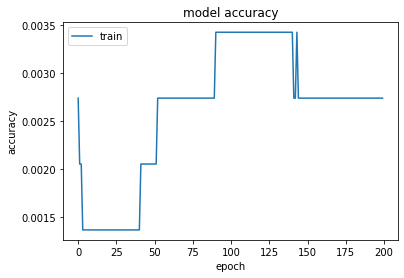

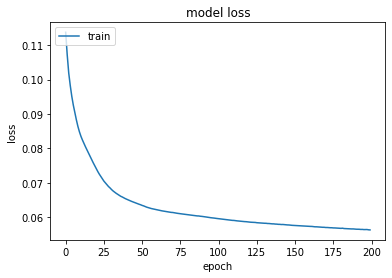

In [15]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluación

In [16]:
results = model.evaluate(X_test, y_test, batch_size=256)
print('Test Accuracy:', results[1])
print('Test Loss:', results[0])

487/487 [==============================] - 0s 78us/sample - loss: 0.0575 - accuracy: 0.0021
Test Accuracy: 0.0020533882
Test Loss: 0.057511029302217145


---

#### Arquitectura 

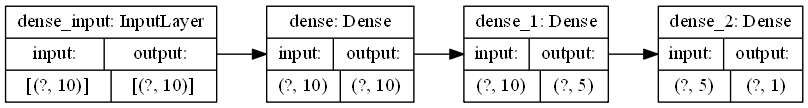

In [17]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
                          rankdir='LR', expand_nested=False, dpi=100)

Calcular probabilidad de muerte de:

In [18]:
probs = []
for r in range (df_pred.shape[0]):
    prob = model.predict(df_pred[r:r+1])[0][0]
    name = df_pred_orig['name'][r]
    print(name, 'prob:', prob)
    probs.append(prob)

Tommen Baratheon prob: 0.10989689
Daenerys Targaryen prob: 0.18307917
Coldhands prob: 0.7639336
Othell Yarwyck prob: 0.5861511
Roland Crakehall (Kingsguard) prob: 0.435504


El personaje con mayor probabilidad de morir es:

In [19]:
df_pred_orig['name'][np.argmax(probs)]

'Coldhands'

Error predicción con estos datos

In [31]:
#Evaluamos con los datos de prediction y su valor de alive
pred_eval=model.evaluate(df_pred,df_pred_orig['alive'])
print('Prediction Accuracy:', pred_eval[1])
print('Prediction Loss:', pred_eval[0])

5/5 [==============================] - 0s 218us/sample - loss: 0.0299 - accuracy: 0.0000e+00
Prediction Accuracy: 0.0
Prediction Loss: 0.029894303530454636


---

##### Cambiando valores del dataset

In [48]:
#Para hacer un csv nuevo y así modificar más raìdo
#df_pred.to_csv(r'C:\Users\Siro Márquez\Desktop\MIGUEL\IA2-Extraordinaria\predict_new.csv', index = False)
df_pred_new = pd.read_csv('predict_new.csv')
df_pred_new

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,isPopular
0,1,0,0,1,1,0,0,0,5,1
1,0,1,1,1,1,1,1,1,15,1
2,1,0,0,1,1,1,0,1,0,1
3,1,1,1,1,1,1,0,1,0,0
4,1,0,0,0,0,0,0,0,5,0


In [49]:
probs = []
for r in range (df_pred_new.shape[0]):
    prob = model.predict(df_pred_new[r:r+1])[0][0]
    name = df_pred_orig['name'][r]
    print(name, 'prob:', prob)
    probs.append(prob)

Tommen Baratheon prob: 0.120292805
Daenerys Targaryen prob: 0.18307917
Coldhands prob: 0.5441517
Othell Yarwyck prob: 0.5861511
Roland Crakehall (Kingsguard) prob: 0.21331893


In [47]:
print('Personaje muerte más probable')
df_pred_orig['name'][np.argmax(probs)]

Personaje muerte más probable


'Othell Yarwyck'